In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

Parámetros cosmológicos

In [2]:
neff0=3.04 # número efectivo de especies relativista
h=.6736 #H0/100 km/s/Mpc
om_bar0=0.051 #parámetro de densidad bariónico a z=0
om_dm0=0.264 #parámetro de densidad de materia oscura a z=0
om_lam0=0.68 #parámetro de densidad de constante cosmológica a z=0
om_rad0=9.237e-05 #parámetro de densidad de radiación a z=0
om_k=0 #de momento es 0 xq estamos viendo universo plano
c=299792 #km/s #velocidad de la luz
kmtoMpc=3.2408e-20 #factor de conversión de km a Mpc
H0s=(h*100)*kmtoMpc
c_over_H0=c*kmtoMpc/H0s #c/H0 rh
c_over_H0

4450.593824228029

Definimos la ecuación de Friedmann para un Universo plano con materia oscura, materia bariónica, radiación y constante cosmológica

\begin{equation}
H^2=\frac{8 \pi G}{3}\left(\rho_{DM} + \rho_{b} + \rho_{r} + \rho_{\Lambda} \right),
\label{eq:FC}
\end{equation}


\begin{eqnarray}
{\dot\rho_{DM}}& + &3\,H \rho_{DM}=0,\\
{\dot\rho_{b}}& + &3\,H \rho_{b}=0,\\
{\dot\rho_{r}}& + &4\,H \rho_{r}=0,\\
{\dot\rho_{\Lambda}}&=&0.
\end{eqnarray}

Si no consideramos neutrinos, la Ec. de Friedmann en término de los parámetros de densidad y redshift

\begin{equation}
H^2=H_{0}^{2}\left[\Omega_{DM0}(1+z)^3 + \Omega_{b0}(1+z)^3 + \Omega_{r0}(1+z)^4+ \Omega_{\Lambda} \right]
\end{equation}

Podemos usar la condición de planitud para $\Omega_{\Lambda}=1-\Omega_{DM0}-\Omega_{b0}-\Omega_{r0}$

In [ ]:
# def Hz(z,h,om_bar0,om_dm0,om_rad0):
    H0=100*h
    Z=1.0+z
    om_lamb=(1.0-om_dm0-om_rad0-om_bar0) #condición de planitud omega lambda 
    x=np.sqrt(om_dm0*(Z)**3+om_bar0*(Z)**3+om_rad0*(Z)**4+om_lamb)
    return x*H0
def Ez(z,h,om_bar0,om_dm0,om_rad0):
    H0=100*h
    return Hz(z,h,om_bar0,om_dm0,om_rad0)/H0
def f(z,h,om_bar0,om_dm0,om_rad0):
    return 1.0/Ez(z,h,om_bar0,om_dm0,om_rad0)

def Dc(z,h,om_bar0,om_dm0,om_rad0):#The total line-of-sight comoving distance 
    om_lamb=(1.0-om_dm0-om_rad0-om_bar0)
    if type(z)==int or type(z)==float or type(z)==np.float64:
        Dc=quad(lambda x:f(x,h,om_bar0,om_dm0,om_rad0), 0, z)[0]
    else:
        Dc=np.array([])
        for i in range(len(z)):
            Dc=np.append(Dc,quad(lambda x:f(x,h,om_bar0,om_dm0,om_rad0), 0, z[i])[0])                
    return c_over_H0*Dc
def tL(z,h,om_bar0,om_dm0,om_rad0): #lookback time tL
    th=1/(100*h) #tiempo de hubble
    om_lamb=(1.0-om_dm0-om_rad0-om_bar0)
    if type(z)==int or type(z)==float:
        Dc=quad(lambda x:f(x,h,om_bar0,om_dm0,om_rad0)/(x+1), 0, z)[0]
    else:
        Dc=np.array([])
        for i in range(len(z)):
            Dc=np.append(Dc,quad(lambda x:f(x,h,om_bar0,om_dm0,om_rad0)/(x+1), 0, z[i])[0])                
    return th*Dc
def Dm(z,h,om_bar0,om_dm0,om_rad0):#Comoving distance transverse 
    if om_k>0:
        D_m=c_over_H0*(om_k)**(-0.5)*np.sinh((om_k)**(0.5)*Dc(z,h,om_bar0,om_dm0,om_rad0)/c_over_H0)
    elif om_k==0:
        D_m=Dc(z,h,om_bar0,om_dm0,om_rad0)      
    else:
        D_m=c_over_H0*(abs(om_k))**(-0.5)*np.sinh((abs(om_k))**(0.5)*Dc(z,h,om_bar0,om_dm0,om_rad0)/c_over_H0)
    return D_m
def Da(z,h,om_bar0,om_dm0,om_rad0): #ANGULAR DISTANCE 
    return Dm(z,h,om_bar0,om_dm0,om_rad0)/(1+z) 
def Dab(z1,z2,h,om_bar0,om_dm0,om_rad0): #Angular diameter disntace DA12 between two objects at redshifts z1 and z2,
    return (1/(1+z2))*(Dm(z2,h,om_bar0,om_dm0,om_rad0)*np.sqrt(1+om_k*(Dm(z1,h,om_bar0,om_dm0,om_rad0))**2/c_over_H0**2)-Dm(z1,h,om_bar0,om_dm0,om_rad0)*np.sqrt(1+om_k*(Dm(z2,h,om_bar0,om_dm0,om_rad0))**2/c_over_H0**2))
def Dl(z,h,om_bar0,om_dm0,om_rad0):#Distancia de Luminosidad
    return Da(z,h,om_bar0,om_dm0,om_rad0)*(1+z)**2

\begin{equation}
\Omega_{M0}=\Omega_{DM0} + \Omega_{b0} ??
\end{equation}

\begin{equation}
H^2=H_{0}^{2}\left[\Omega_{r0}(1+z)^4+(1-\Omega_{M0}-\Omega_{r0})(1+z)^{3(1+w_{x})}+
 \frac{\Omega_{M0}}{\delta+3w_x}\left[\delta(1+z)^{3(1+w_x)}+3w_{x}(1+z)^{3-\delta} \right] \right]
\end{equation}

In [6]:
#modelos cosmologicos
def Hz_i(z,h,om_bar0,om_dm0,om_rad0,wx,delta): #interactuantes
    H0=100*h
    om_m0=om_bar0+om_dm0
    Z=1.0+z
    W=1+wx
    om_lamb=(1.0-om_rad0-om_m0) #condición de planitud omega lambda 
    x=np.sqrt(om_rad0*(Z)**4+om_lamb*(Z)**(3*W)+om_m0*(delta*(Z)**(3*W)+3*wx*Z**(3-delta))/(delta+3*wx))
    return x*H0

In [13]:
wx= -0.95
delta=0.77
Hz_i(0,h,om_bar0,om_dm0,om_rad0,wx,delta)
#Hz(1,h,om_bar0,om_dm0,om_rad0)


67.36

In [14]:
bins=50
zbin=np.linspace(0,2,bins)
#print(zbin)

In [15]:
#print(Hzbin)

GRaficamos H(z) vs z

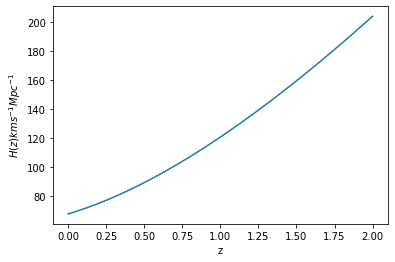

In [16]:
fig1=plt.figure()
plt.plot(zbin,Hz(zbin,h,om_bar0,om_dm0,om_rad0))
plt.xlabel('z')
plt.ylabel('$H(z) km s^{-1} Mpc^{-1}$')
plt.show()
fig1.savefig("Hz.pdf")

Tarea, calcular la edad del Universo. Sugerencia usar la función quad

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

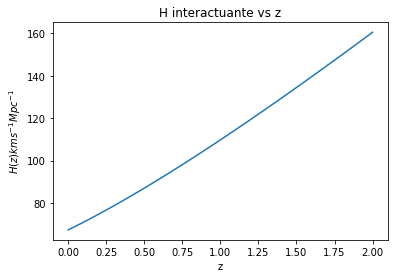

In [17]:

fig1=plt.figure()
plt.plot(zbin,Hz_i(zbin,h,om_bar0,om_dm0,om_rad0,wx,delta))
plt.title('H interactuante vs z')
plt.xlabel('z')
plt.ylabel('$H(z) km s^{-1} Mpc^{-1}$')
plt.show()
fig1.savefig("Hz.pdf")

In [29]:
#def f(z,h,om_bar0,om_dm0,om_rad0):
 #   return 1.0/Ez(z,h,om_bar0,om_dm0,om_rad0)

#Definición de distancia comóvil

#def Dc(z,h,om_bar0,om_dm0,om_rad0):
 #   return c_over_H0*quad(lambda x:f(x,h,om_bar0,om_dm0,om_rad0),0,z,)[0]


Graficamos la distancia comóvil como función de z

Tarea: 

1)Definir funciones para calcular la distancia de diámetro angular y disntancia de luminosidad como función de z
2)Evaluar dichar funciones para un vector de z de 0 a 2
3)Graficar DA vs z y DL vs z

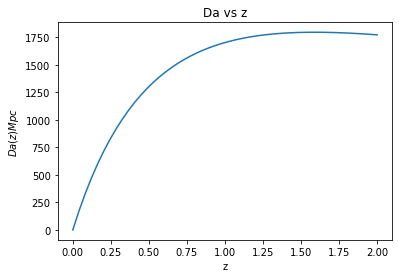

In [31]:
bins=50
zbin=np.linspace(0,2,bins)
fig1=plt.figure()
plt.plot(zbin,Da(zbin,h,om_bar0,om_dm0,om_rad0))
plt.title('Da vs z')
plt.xlabel('z')
plt.ylabel('$Da(z) Mpc$')
plt.show()

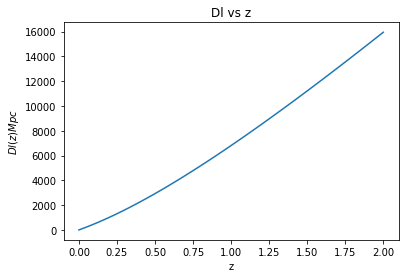

In [32]:
bins=50
zbin=np.linspace(0,2,bins)
fig1=plt.figure()
plt.plot(zbin,Dl(zbin,h,om_bar0,om_dm0,om_rad0))
plt.title('Dl vs z')
plt.xlabel('z')
plt.ylabel('$Dl(z) Mpc$')
plt.show()

In [117]:
class Cosmology:
    """A simple example class"""
    def Hz_i(z,h,om_bar0,om_dm0,om_rad0,wx,delta): #interactuantes
        H0=100*h
        om_m0=om_bar0+om_dm0
        Z=1.0+z
        W=1+wx
        om_lamb=(1.0-om_rad0-om_m0) #condición de planitud omega lambda 
        x=np.sqrt(om_rad0*(Z)**4+om_lamb*(Z)**(3*W)+om_m0*(delta*(Z)**(3*W)+3*wx*Z**(3-delta))/(delta+3*wx))
        return x*H0
    def Hz(z,h,om_bar0,om_dm0,om_rad0): #estandar
        H0=100*h
        Z=1.0+z
        om_lamb=(1.0-om_dm0-om_rad0-om_bar0) #condición de planitud omega lambda 
        x=np.sqrt(om_dm0*(Z)**3+om_bar0*(Z)**3+om_rad0*(Z)**4+om_lamb)
        return x*H0


In [33]:
wx= -0.95
delta=0.77
Hz_i(1,h,om_bar0,om_dm0,om_rad0,wx,delta)

109.79628048899333

In [105]:
class Cosmology:
    def Hz_i(z,h,om_bar0,om_dm0,om_rad0,wx,delta): #interactuantes
        Z=1.0+z
        W=1+wx
        om_m0=om_bar0+om_dm0
        om_lamb=(1.0-om_rad0-om_m0) #condición de planitud omega lambda 
        x=H0*np.sqrt(om_rad0*(Z)**4+om_lamb*(Z)**(3*W)+om_m0*(delta*(Z)**(3*W)+3*wx*Z**(3-delta))/(delta+3*wx))
        return 
    def Hz(z,h,om_bar0,om_dm0,om_rad0): #estandar
        H0=100*h
        Z=1.0+z
        om_lamb=(1.0-om_dm0-om_rad0-om_bar0) #condición de planitud omega lambda 
        x=H0*np.sqrt(om_dm0*(Z)**3+om_bar0*(Z)**3+om_rad0*(Z)**4+om_lamb)
        return 
    
    
#Cosmology.Hz_i(1,h,om_bar0,om_dm0,om_rad0,wx,delta)['Ez']
Cosmology.Hz(0,h,om_bar0,om_dm0,om_rad0)

67.36

In [95]:
Hz(0,h,om_bar0,om_dm0,om_rad0)

67.36

In [67]:
def Dab(z1,z2,h,om_bar0,om_dm0,om_rad0): #Angular diameter disntace DA12 between two objects at redshifts z1 and z2,
    return (1/(1+z2))*(Dm(z2,h,om_bar0,om_dm0,om_rad0)*np.sqrt(1+om_k*(Dm(z1,h,om_bar0,om_dm0,om_rad0))**2/c_over_H0**2)-Dm(z1,h,om_bar0,om_dm0,om_rad0)*np.sqrt(1+om_k*(Dm(z2,h,om_bar0,om_dm0,om_rad0))**2/c_over_H0**2))

In [112]:
def Calculo(z,h,om_bar0,om_dm0,om_rad0,x): #interactuantes
        th=1/(100*h)
        H0=100*h
        #lookback time tL/#The total line-of-sight comoving distance dc
        if type(z)==int or type(z)==float or type(z)==np.float64:
            Dc=quad(lambda I:H0/x, 0, z)[0]
            #x:f(x,h,om_bar0,om_dm0,om_rad0)/(x+1)
            tc=quad(lambda x:1.0/(x/H0)/(x+1), 0, z)[0]
        else:
            Dc=np.array([])
            tc=np.array([])
            for i in range(len(z)):
                Dc=np.append(Dc,quad(lambda x:H0/(x[i]), 0, z[i])[0])
                tc=np.append(tc,quad(lambda x:1.0/(x[i]/H0)/(y+1), 0, z[i])[0])                
        #dm Comoving distance transverse 
        if om_k>0:
            D_m=c_over_H0*(om_k)**(-0.5)*np.sinh((om_k)**(0.5)*c_over_H0*Dc/c_over_H0)
        elif om_k==0:
            D_m=c_over_H0*Dc     
        else:
            D_m=c_over_H0*(abs(om_k))**(-0.5)*np.sinh((abs(om_k))**(0.5)*c_over_H0*Dc/c_over_H0)
        Da=D_m/(1+z) #ANGULAR DISTANCE 
        dl=Da*(1+z)**2 #Distancia de Luminosidad
        return {'huble':x,'Ez':x/H0,'f':1.0/(x/H0),'Dc':c_over_H0*Dc,'tL':th*tc,'Da':Da,'dl':dl}
Calculo(1,h,om_bar0,om_dm0,om_rad0,Cosmology.Hz(1,h,om_bar0,om_dm0,om_rad0))

<ipython-input-112-5e015b45d792>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  tc=quad(lambda x:1.0/(x/H0)/(x+1), 0, z)[0]


{'huble': 120.61739642542979,
 'Ez': 1.7906383079784707,
 'f': 0.5584600728937512,
 'Dc': 2485.4789514988643,
 'tL': 40.98369349482808,
 'Da': 1242.7394757494321,
 'dl': 4970.9579029977285}

In [107]:
Dc(1,h,om_bar0,om_dm0,om_rad0)

3402.949023150786

In [ ]:
def Hz(z,h,om_bar0,om_dm0,om_rad0): #estandar
        H0=100*h
        c_over_H0=c*kmtoMpc/H0s
        th=1/(100*h) #tiempo de hubble
        print(c_over_H0)
        Z=1.0+z
        om_lamb=(1.0-om_dm0-om_rad0-om_bar0) #condición de planitud omega lambda 
        x=np.sqrt(om_dm0*(Z)**3+om_bar0*(Z)**3+om_rad0*(Z)**4+om_lamb)
        #lookback time tL/#The total line-of-sight comoving distance dc
        if type(z)==int or type(z)==float or type(z)==np.float64:
            Dc=c_over_H0*quad(lambda z:H0/x, 0, z)[0]
            #x:f(x,h,om_bar0,om_dm0,om_rad0)/(x+1)
            tc=quad(lambda y:1.0/(x/H0)/(y+1), 0, z)[0]
        else:
            Dc=np.array([])
            tc=np.array([])
            for i in range(len(z)):
                Dc=np.append(Dc,c_over_H0*quad(lambda O:H0/(x[i]), 0, z[i])[0])
                tc=np.append(tc,quad(lambda y:1.0/(x[i]/H0)/(y+1), 0, z[i])[0])                
        #dm Comoving distance transverse 
        if om_k>0:
            D_m=c_over_H0*(om_k)**(-0.5)*np.sinh((om_k)**(0.5)*c_over_H0*Dc/c_over_H0)
        elif om_k==0:
            D_m=c_over_H0*Dc     
        else:
            D_m=c_over_H0*(abs(om_k))**(-0.5)*np.sinh((abs(om_k))**(0.5)*c_over_H0*Dc/c_over_H0)
        Da=D_m/(1+z) #ANGULAR DISTANCE 
        dl=Da*(1+z)**2 #Distancia de Luminosidad
        return {'huble':x*H0,'Ez':x/H0,'f':1.0/(x/H0),'Dc':Dc,'tL':th*tc,'Da':Da,'dl':dl}
    